### Stock Market Prediction And Forecasting Using Stacked LSTM

In [53]:
### Keras and Tensorflow >2.0

In [54]:
### Data Collection
import pandas_datareader as pdr
key="0d1ba115ceb75c7e5255bc6c89bbe509c08d0e38"

In [55]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [56]:
df.to_csv('AAPL.csv')

In [57]:
import pandas as pd

In [58]:
df=pd.read_csv('AAPL.csv')

In [59]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-23 00:00:00+00:00,117.75,119.73,117.34,119.27,32482528,27.269555,27.728101,27.174604,27.621570,129930112,0.0,1.0
1,AAPL,2015-11-24 00:00:00+00:00,118.88,119.35,117.12,117.33,42803172,27.531251,27.640097,27.123655,27.172288,171212688,0.0,1.0
2,AAPL,2015-11-25 00:00:00+00:00,118.03,119.23,117.92,119.21,21388308,27.334400,27.612307,27.308926,27.607675,85553232,0.0,1.0
3,AAPL,2015-11-27 00:00:00+00:00,117.81,118.41,117.60,118.29,13046445,27.283451,27.422404,27.234817,27.394613,52185780,0.0,1.0
4,AAPL,2015-11-30 00:00:00+00:00,118.30,119.41,117.75,117.99,39180322,27.396929,27.653993,27.269555,27.325137,156721288,0.0,1.0


In [60]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-11-13 00:00:00+00:00,119.26,119.6717,117.870,119.44,81688586,119.26,119.6717,117.870,119.44,81688586,0.0,1.0
1254,AAPL,2020-11-16 00:00:00+00:00,120.30,120.9900,118.146,118.92,91183018,120.30,120.9900,118.146,118.92,91183018,0.0,1.0
1255,AAPL,2020-11-17 00:00:00+00:00,119.39,120.6741,118.960,119.55,74270973,119.39,120.6741,118.960,119.55,74270973,0.0,1.0
1256,AAPL,2020-11-18 00:00:00+00:00,118.03,119.8200,118.000,118.61,76322111,118.03,119.8200,118.000,118.61,76322111,0.0,1.0
1257,AAPL,2020-11-19 00:00:00+00:00,118.64,119.0600,116.810,117.59,74112972,118.64,119.0600,116.810,117.59,74112972,0.0,1.0


In [61]:
df1=df.reset_index()['close']

In [62]:
df1

0       117.75
1       118.88
2       118.03
3       117.81
4       118.30
         ...  
1253    119.26
1254    120.30
1255    119.39
1256    118.03
1257    118.64
Name: close, Length: 1258, dtype: float64

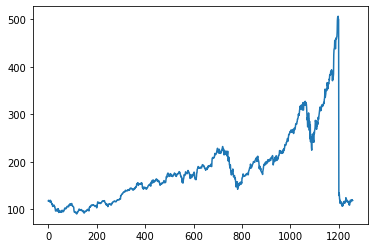

In [63]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [64]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [65]:
import numpy as np

In [66]:
df1

0       117.75
1       118.88
2       118.03
3       117.81
4       118.30
         ...  
1253    119.26
1254    120.30
1255    119.39
1256    118.03
1257    118.64
Name: close, Length: 1258, dtype: float64

## Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
print(df1)

[[0.06592904]
 [0.06864702]
 [0.06660253]
 ...
 [0.06987372]
 [0.06660253]
 [0.06806975]]


In [69]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [70]:
training_size,test_size

(817, 441)

In [71]:
train_data

array([[0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.009

In [72]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [73]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [74]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [75]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [76]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

LSTM MODEL

In [77]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [78]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0089 - val_loss: 0.0603
Epoch 2/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0024 - val_loss: 0.0222
Epoch 3/100
12/12 [==============================] - 2s 171ms/step - loss: 8.0161e-04 - val_loss: 0.0212
Epoch 4/100
12/12 [==============================] - 2s 173ms/step - loss: 6.1242e-04 - val_loss: 0.0206
Epoch 5/100
12/12 [==============================] - 2s 171ms/step - loss: 4.6542e-04 - val_loss: 0.0216
Epoch 6/100
12/12 [==============================] - 2s 173ms/step - loss: 4.0091e-04 - val_loss: 0.0212
Epoch 7/100
12/12 [==============================] - 2s 174ms/step - loss: 4.1037e-04 - val_loss: 0.0198
Epoch 8/100
12/12 [==============================] - 2s 169ms/step - loss: 3.6330e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 3.5050e-04 - val_loss: 0.0190
Epoch 10/100
12/12 [==============================] - 2s 183ms/

In [82]:
import tensorflow as tf

In [83]:
tf.__version__

'2.3.0'

In [84]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [85]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [86]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

157.17235147760363

In [87]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

295.67771930427904

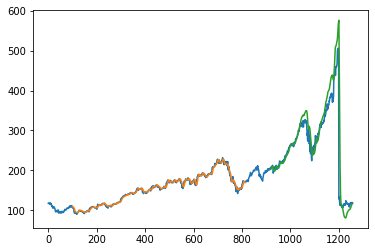

In [88]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [89]:
len(test_data)

441

In [90]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [91]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [92]:
temp_input

[0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.0648

In [93]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.06606279]
101
1 day input [0.65849669 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825
 0.70131088 0.71651233 0.72293446 0.711365   0.70948888 0.72901984
 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379
 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0

In [94]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [95]:
import matplotlib.pyplot as plt

In [96]:
len(df1)

1258

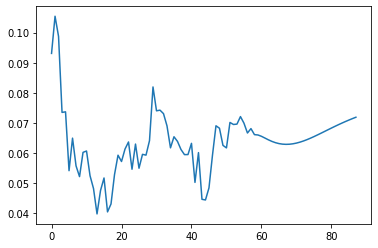

In [98]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

# This show that there is a increase in stock price and also from the sentiment also we found a hike so we could buy apple stocks and also we could hold the apple stock for better profit gain